In [4]:
from keras.datasets import mnist

In [5]:
from keras.preprocessing.image import load_img, array_to_img

In [6]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

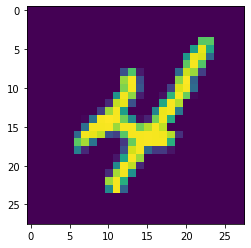

In [76]:
plt.imshow(x_train[9])
plt.show()

In [77]:
y_train[9]

4

In [78]:
x_train.shape

(60000, 28, 28)

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
x_train = x_train.reshape(60000,28,28,1)

In [80]:
x_test = x_test.reshape(10000,28,28,1)

ValueError: Found array with dim 4. MinMaxScaler expected <= 2.

In [27]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [29]:
y_train.shape

(60000, 10)

In [31]:
y_train[9]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
cnn = Sequential()


In [59]:
cnn.add(Conv2D(32, kernel_size= (5,5), input_shape=(28,28,1), activation='relu', padding='same'))
cnn.add(MaxPooling2D())

In [60]:
cnn.add(Conv2D(64, (5,5), activation='relu', padding='same'))

In [61]:
cnn.add(MaxPooling2D())

In [63]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
cnn.add(Flatten())

In [64]:
cnn.add(Dense(1024, activation='relu'))
cnn.add(Dense(10, activation = 'softmax'))

In [65]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          5

In [66]:
history = cnn.fit(x_train,y_train,epochs=5,verbose=1,validation_data=(x_train,y_train))

Train on 60000 samples, validate on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 258s 4ms/sample - loss: 0.1136 - accuracy: 0.9646 - val_loss: 0.0575 - val_accuracy: 0.9831
Epoch 2/5
60000/60000 [==============================] - 265s 4ms/sample - loss: 0.0420 - accuracy: 0.9874 - val_loss: 0.0395 - val_accuracy: 0.9892
Epoch 3/5
60000/60000 [==============================] - 265s 4ms/sample - loss: 0.0331 - accuracy: 0.9904 - val_loss: 0.0137 - val_accuracy: 0.9956
Epoch 4/5
60000/60000 [==============================] - 264s 4ms/sample - loss: 0.0272 - accuracy: 0.9921 - val_loss: 0.0139 - val_accuracy: 0.9955
Epoch 5/5
60000/60000 [==============================] - 259s 4ms/sample - loss: 0.0214 - accuracy: 0.9935 - val_loss: 0.0248 - val_accuracy: 0.9926


In [67]:
score = cnn.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [68]:
score

[0.04231010670328105, 0.9891]

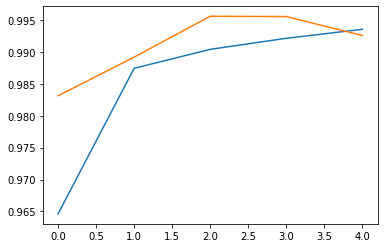

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])